In [1]:
import sys
import pandas as pd
import os
import time 


sys.path.append(r'/home/ege/Documents/python/data')

In [2]:
from __future__ import absolute_import
from apriori import apriori
from fp import Fp_Growth

# Defining benchmark functions#

In [3]:
def apriori_timer(data,**kwargs):
    t0 = time.time()
    Ap_time = []
    for x , y in kwargs.items():
        Ap = apriori(data, y[0] , y[1] )
        Frequency_list ,Confidence_list  = Ap.Miner()
        t1 = time.time()
        Per_iter_time = t1-t0
        Ap_time.append(Per_iter_time)
    return Ap_time     

In [4]:
def Fp_timer(data , **kwargs):
    t0 = time.time()
    Fp_time = []
    for x ,y in kwargs.items():
        Fp = Fp_Growth(data, y[0] , y[1])
        Frequency_list ,Confidence_list  = Fp.Pickaxe()
        t1 = time.time()
        Per_iter_time = t1-t0
        Fp_time.append(Per_iter_time)
    return Fp_time

# Importing the data

In [5]:
data =  pd.read_csv("/home/ege/Documents/python/data/sepet.csv")

# Benchmarking

In [9]:
Ap_time = apriori_timer(data, case1 = [20,20] , case2 = [15,10] , case3 = [10,5] ,case4 = [7,5])

In [10]:
Fp_time = Fp_timer(data, case1 = [20,20] , case2 = [15,10] , case3 = [10,5] , case4 = [7,5])

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df_ap = pd.DataFrame(data = Ap_time, columns = ["Ap times"])
df_fp = pd.DataFrame( data = Fp_time , columns = ["Fp times"])
df_main = pd.concat([df_ap , df_fp] , axis = 1)

In [27]:
df_main.head()

,Ap times,Fp times
0,0.430237,0.079633
1,1.153148,0.177950
2,3.043649,0.295270
3,954.947995,0.645460


In [86]:
columns = ["Apriori ","Fp Growth"]

<ipython-input-87-ab4cde5d7001>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.barh( columns, df_main.iloc[0].values, color ='rg'


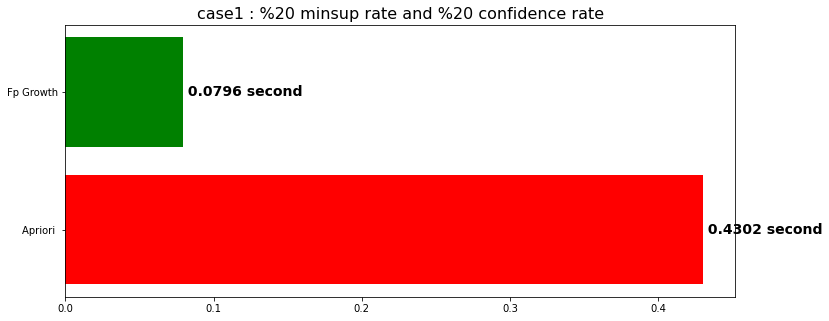

In [87]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_main.iloc[0].values):
  ax.text(v, i, " "+str("%.4f" % v) + " second", color='black', va='center', fontweight='bold',fontsize = 14)

plt.barh( columns, df_main.iloc[0].values, color ='rg'  
        ) 


plt.title("case1 : %20 minsup rate and %20 confidence rate" , fontsize = 16) 
plt.show()  

<ipython-input-88-31e67ca37a95>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.barh( columns, df_main.iloc[1].values, color ='rg'  )


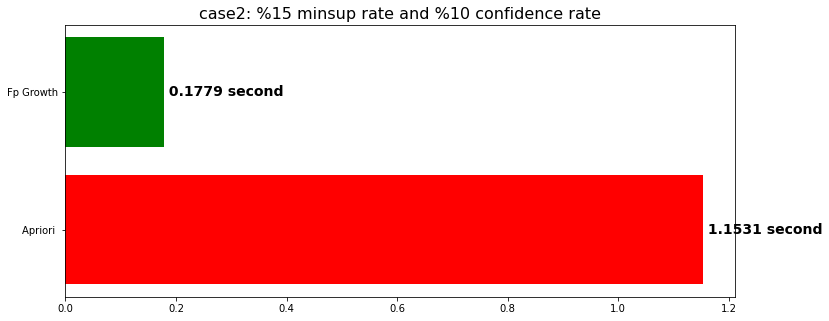

In [88]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_main.iloc[1].values):
  ax.text(v, i, " "+str("%.4f" % v) + " second", color='black', va='center', fontweight='bold',fontsize = 14)

plt.barh( columns, df_main.iloc[1].values, color ='rg'  ) 


plt.title("case2: %15 minsup rate and %10 confidence rate" , fontsize = 16 )
plt.show() 

<ipython-input-89-751b395c6f5c>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.barh( columns, df_main.iloc[2].values, color ='rg'


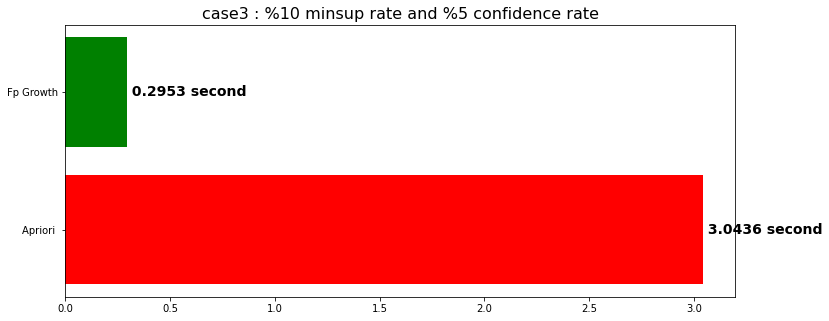

In [89]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_main.iloc[2].values):
  ax.text(v, i, " "+str("%.4f" % v) + " second", color='black', va='center', fontweight='bold',fontsize = 14)

plt.barh( columns, df_main.iloc[2].values, color ='rg'  
        ) 


plt.title("case3 : %10 minsup rate and %5 confidence rate" , fontsize = 16) 
plt.show() 

<ipython-input-90-9a87eeceeaa6>:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.barh( columns, df_main.iloc[3].values, color ='rg'


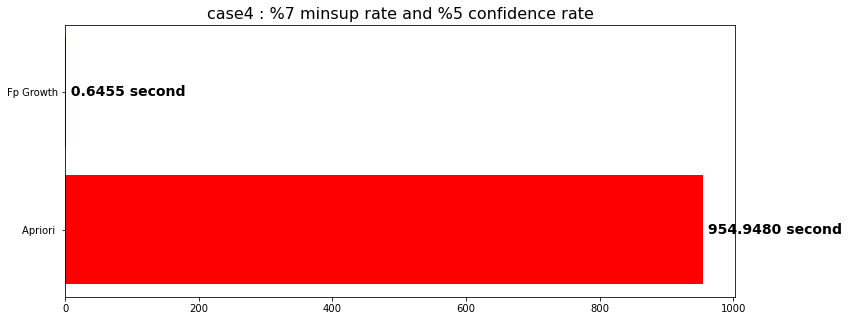

In [90]:
fig , ax = plt.subplots(figsize = (12,5))
for i, v in enumerate( df_main.iloc[3].values):
  ax.text(v, i, " "+str("%.4f" % v) + " second", color='black', va='center', fontweight='bold',fontsize = 14)

plt.barh( columns, df_main.iloc[3].values, color ='rg'  
        ) 


plt.title("case4 : %7 minsup rate and %5 confidence rate" , fontsize = 16) 
plt.show() 